## Extract Dataset

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
!pip install pycuda
!apt-get install -y libcusparse8.0 libcudnn7=7.6.5.32-1+cuda10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2022.2.2-cp310-cp310-linux_x86_64.whl size=661975 sha256=8e738a9d03dabad8979b439c3d5ee19dfe13768e5d9e045533e3540e324e4a3b
  Stored in directory: /root/.cache/pip/wheels/1d/7b/06/82a395a243fce00035dea9914d92bbef0013401497d849f8bc
  Created wheel for pytools: filename=pytools-2022.1.14-py2.py3-none-any.whl size=69855 sha256=f8a5c28125b3d9cdad0090329b8e95308f9cbbc300e6e1b682cdf8b06639b5b7
  Stored in directory: /root/.cache/pip/wheels/19/02

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/deep_learning'

/content/drive/MyDrive/deep_learning


In [5]:
!apt-get install -y bzip2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bzip2 is already the newest version (1.0.8-2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [6]:
!bzip2 -dk vents.csv.bz2

bzip2: Output file vents.csv already exists.


## Load and join all the datasets for Vent

In [7]:
# Load Vent dataset
import pandas as pd
vents = pd.read_csv('vents.csv')
vents.head()

,emotion_id,user_id,created_at,reactions,text
0,a992d9f0-1b4c-4a6c-9d73-4cd7deb287ef,1a62fe90-d702-3051-b5fe-0a9c86adac56,2014-11-15 12:01:22.000,0.0,first post
1,fe1ac197-3294-493f-ba9d-04c6bfbea10c,f05733e9-078c-3413-848d-a30a7f502ee9,2015-04-24 07:32:16.006,6.0,mmaybe hug this if its ok to follow you again ...
2,3180a95c-c03d-4a36-b78c-26d54d928049,336d37c1-9dfe-3454-a60d-dfa853f52bcc,2014-12-29 04:03:26.000,0.0,I hate fuckin every single person on this fuck...
3,d84f9579-ba96-4818-93a5-7ff12f504098,f281696f-5be8-4b4c-bc44-056ebd6f4157,2018-05-11 07:20:36.284,1.0,"💀 DYING 💀 is 5th on trending, it almost has 30..."
4,abc354fa-7778-490b-81e9-01c6e7f776a0,f281696f-5be8-4b4c-bc44-056ebd6f4157,2018-04-20 20:26:44.275,999.0,💀 DYING 💀 \n[ 👻 ] [ YIKES ] [ FUCK ] [ HELP ]\...


In [8]:
# Load emotion_categories dataset
emotion_categories = pd.read_csv('emotion_categories.csv')
emotion_categories

,id,name
0,0af046e4-bf8d-4776-8d05-2e5128568330,Anger
1,9d5657eb-7719-42af-9055-c845fa35ba02,🧛 Vampire 🧛
2,d3bc526b-b869-4e04-b959-d9a6783dc487,✨ Advent ✨
3,f40868cf-4839-46cc-9101-81914658375f,🕯️ Trans Remembrance 🕯️
4,c105593f-9e96-47e6-9246-d7458f9a6a4b,🐇 Rabbit Day 🐇
...,...,...
58,ab8f9f39-92fb-4133-acee-0221df84a7d0,🥀 Punk Day 🥀
59,1c81e39f-e983-4124-b9e9-07f19125987d,🍾 New Year 🍾
60,a80f91d1-8509-4083-88fb-f45e16989ad3,㊗ Lunar NY ㊗
61,79bcdf8a-14fa-4b54-a21c-022f69395c37,🐰 Springy 🐰


In [9]:
# Load emotions dataset
emotions = pd.read_csv('emotions.csv')
emotions

,id,emotion_category_id,name,enabled
0,cc0971b3-e423-4ca5-95bb-1bb6d1196a97,abdc8e31-96e9-40f9-8ca7-7a4687986074,Adoring,True
1,e96425a8-9841-4433-8177-f4e15e44a823,e7ef5c5b-95d4-4b58-ab23-03376f9ae4e3,🌚 NAUGHTY 🌚,False
2,c36ce961-0dea-4929-93cf-f54214fef290,22740139-e807-4bd0-a6aa-0bfc4dcc7dd7,🌈 Supportive 🌈,True
3,15507c35-9a8a-469d-9ccb-a841be79fc1c,00e7f090-a2ab-4cf4-ad9f-6b45ebb3cb2b,🌎 Powerful 🌏,True
4,1acf46ff-49fc-4d92-9555-3608773ffefc,7db21f2c-f0c8-48e1-8ed3-099124cb5c08,Confused,True
...,...,...,...,...
700,7aa98e86-79a9-4de6-b4c5-7f0082fba774,7aa8138f-f06a-4bd0-a0f5-a28893515215,🐾 Crossed 🐾,True
701,8a931a34-24a4-41a1-9817-f0a0562a8a66,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,🇨🇷 Pura Vida 🇨🇷,False
702,0f80c434-1970-4c5f-8a67-8a3c789444e6,9d5657eb-7719-42af-9055-c845fa35ba02,⏳ Immortalized ⏳,True
703,bee22a49-af35-4c78-88b3-09fa611246c8,a16fef0e-7af8-486d-999c-9b59632d9c5f,🌸 Lovely 🌸,True


In [10]:
# Join emotion_categories and emotions on the common column 'id' and 'emotion_category_id'
merged_df = pd.merge(emotion_categories, emotions,  how='inner',left_on='id', right_on='emotion_category_id')

# Print the merged dataframe
merged_df

,id_x,name_x,id_y,emotion_category_id,name_y,enabled
0,0af046e4-bf8d-4776-8d05-2e5128568330,Anger,302a737d-46fb-43ea-9079-c4c69040bf26,0af046e4-bf8d-4776-8d05-2e5128568330,Angry,True
1,0af046e4-bf8d-4776-8d05-2e5128568330,Anger,035dcb03-106f-46e8-ab84-fe3cc94c149f,0af046e4-bf8d-4776-8d05-2e5128568330,Annoyed,True
2,0af046e4-bf8d-4776-8d05-2e5128568330,Anger,ea7e1dc6-99bb-43d8-a227-af06f968f163,0af046e4-bf8d-4776-8d05-2e5128568330,Disgusted,True
3,0af046e4-bf8d-4776-8d05-2e5128568330,Anger,730d4894-def4-4b34-ae23-ea4fc91d8104,0af046e4-bf8d-4776-8d05-2e5128568330,Frustrated,True
4,0af046e4-bf8d-4776-8d05-2e5128568330,Anger,0971632e-3da0-4380-acbd-19cd05b024e0,0af046e4-bf8d-4776-8d05-2e5128568330,Done,True
...,...,...,...,...,...,...
700,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,✡️ Hanukkah ✡️,b08549f0-c75c-44fc-9294-ff357ef439d0,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,📖 Blessed 📖,True
701,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,✡️ Hanukkah ✡️,090d0f72-0fba-4013-bfcf-eaa37390754a,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,💝 Generous 💝,True
702,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,✡️ Hanukkah ✡️,28b54dd0-8f3c-4ad1-8ee3-1549db51453b,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,🕎 Gr-eight-ful 🕎,True
703,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,✡️ Hanukkah ✡️,9cf5ef41-5447-4506-ad4e-218f2f766d34,cc4fe356-e0b1-4cf3-94f2-87a0df3c70a1,🌟 Glowing 🌟,True


In [11]:
# Extract category == "Feelings"
label_feelings_df = merged_df[merged_df['name_x'].str.contains('Feelings')]
label_feelings_df

,id_x,name_x,id_y,emotion_category_id,name_y,enabled
218,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Hungry,True
219,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,2ca41655-7436-4a50-81b4-8d209c5df984,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Confident,False
220,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,a4dfef40-f02f-4ddc-9dfa-e156e4375346,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Hurt,True
221,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,7bdc7c69-4263-434f-9322-507bcafba2da,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,☘FESTIVE ☘,False
222,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,8c5cc6c1-46fd-4a73-8899-9cda247755cb,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,😇 HONEST 😇,False
223,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,42935e4e-2c07-4bda-8377-d74d4cf817d7,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Guilty,True
224,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,dc93830e-9a5c-46c4-a6de-9b5f0e270fc5,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Upset,True
225,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,1affd585-6230-416a-a093-418190e1d994,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Nostalgic,True
226,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,b01b8e6c-3fd5-4ca2-aa8f-3fef176ac4d1,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Bored,True
227,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,Feelings,27e90cd1-3c37-468b-be49-dbf9cad0598a,1cd9b8ed-23d1-4a1a-83cd-0de7159ef604,🌿 Safe 🌿,False


In [12]:
#select the specific emotion id with the emotion name
feeling_label = label_feelings_df[['id_y', 'name_y']]
feeling_label.head()

,id_y,name_y
218,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Hungry
219,2ca41655-7436-4a50-81b4-8d209c5df984,Confident
220,a4dfef40-f02f-4ddc-9dfa-e156e4375346,Hurt
221,7bdc7c69-4263-434f-9322-507bcafba2da,☘FESTIVE ☘
222,8c5cc6c1-46fd-4a73-8899-9cda247755cb,😇 HONEST 😇


In [13]:
# Join Feeling_label with vent to get text along with specific emotion
merged_feeling_text_df = pd.merge(feeling_label, vents,  how='inner',left_on='id_y', right_on='emotion_id')
merged_feeling_text_df.head()

,id_y,name_y,emotion_id,user_id,created_at,reactions,text
0,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Hungry,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-12-03 03:09:30.627,0.0,Omg I eat too much I need to stop fr
1,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Hungry,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-11-21 16:26:33.627,4.0,Im starving.... Literally
2,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Hungry,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-11-17 16:24:22.192,6.0,I always have a snack before my meals cause I ...
3,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Hungry,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,bde48414-c86e-398f-bfd1-1c00c0f941d4,2016-07-30 19:40:43.437,0.0,UGHHHHHH
4,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Hungry,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,cde621f6-965e-491d-a5c4-92b0247994bc,2016-01-21 11:27:13.498,3.0,CRAVING FOR PIZZA AND SIOMAI. 😣😣


In [14]:
merged_feeling_text_df.shape

(4359045, 7)

## Vent Data Cleaning, binarized and Sampling

In [15]:
import re

In [17]:
# Remove comments with unwanted patterns (single character space, special character, emojis etc.)
# Function to remove emojis
def remove_emojis(data):
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese characters
                      u"\U00002702-\U000027B0"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"  # dingbats
                      u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

# Removing single character spaces, special characters, and emojis
#merged_feeling_text_df['text'] = merged_feeling_text_df['text'].apply(lambda x: re.sub(r'\W|\b\w\b', ' ', x)) # Remove single character and special characters
# Clean text data
def clean_text(text):
    # Remove non-ascii characters
    text = text.encode("ascii", errors="ignore").decode()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text, flags=re.MULTILINE)
    # Remove all the special characters
    text = ' '.join(re.findall(r'\b\w+\b', text))
    # Single character removal
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Remove empty or only space-containing cells
    if text.strip() == "":
        return None

    # Substitute overlong sequences of identical characters (more than 2)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    return text

merged_feeling_text_df['text'] = merged_feeling_text_df['text'].apply(remove_emojis) # Remove emojis
merged_feeling_text_df['text'] = merged_feeling_text_df['text'].apply(clean_text)
merged_feeling_text_df = merged_feeling_text_df[merged_feeling_text_df['text'].notna()]


# Drop null values
merged_feeling_text_df = merged_feeling_text_df.dropna(subset=['text'])

# Print the updated dataframe
print(merged_feeling_text_df.head())

                                   id_y  name_y  \
0  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
1  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
2  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
3  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
4  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   

                             emotion_id                               user_id  \
0  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  3d84e6de-51dd-46dd-8eb1-7417cdcbb41c   
1  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  3d84e6de-51dd-46dd-8eb1-7417cdcbb41c   
2  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  3d84e6de-51dd-46dd-8eb1-7417cdcbb41c   
3  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  bde48414-c86e-398f-bfd1-1c00c0f941d4   
4  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  cde621f6-965e-491d-a5c4-92b0247994bc   

                created_at  reactions  \
0  2015-12-03 03:09:30.627        0.0   
1  2015-11-21 16:26:33.627        4.0   
2  2015-11-17 16:24:22.192        6.0   
3  2016-07-30 19:40:43.437        0.0   
4

In [18]:
merged_feeling_text_df['text'] = merged_feeling_text_df['text'].str.lower()
merged_feeling_text_df['text'] = merged_feeling_text_df['text'].apply(lambda x: re.sub(r'\W+', ' ', x))

# Statistics and Distribution

In [20]:
# Display the first few rows of the dataset
print(merged_feeling_text_df.head())

# Get summary statistics of the dataset
print(merged_feeling_text_df.describe())

# Check the data types of each column
print(merged_feeling_text_df.info())

# Check for missing values
print(merged_feeling_text_df.isnull().sum())

                                   id_y  name_y  \
0  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
1  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
2  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
3  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   
4  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  Hungry   

                             emotion_id                               user_id  \
0  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  3d84e6de-51dd-46dd-8eb1-7417cdcbb41c   
1  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  3d84e6de-51dd-46dd-8eb1-7417cdcbb41c   
2  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  3d84e6de-51dd-46dd-8eb1-7417cdcbb41c   
3  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  bde48414-c86e-398f-bfd1-1c00c0f941d4   
4  c0dd0bcf-81c3-48d8-b75b-e150c24162bc  cde621f6-965e-491d-a5c4-92b0247994bc   

                created_at  reactions  \
0  2015-12-03 03:09:30.627        0.0   
1  2015-11-21 16:26:33.627        4.0   
2  2015-11-17 16:24:22.192        6.0   
3  2016-07-30 19:40:43.437        0.0   
4

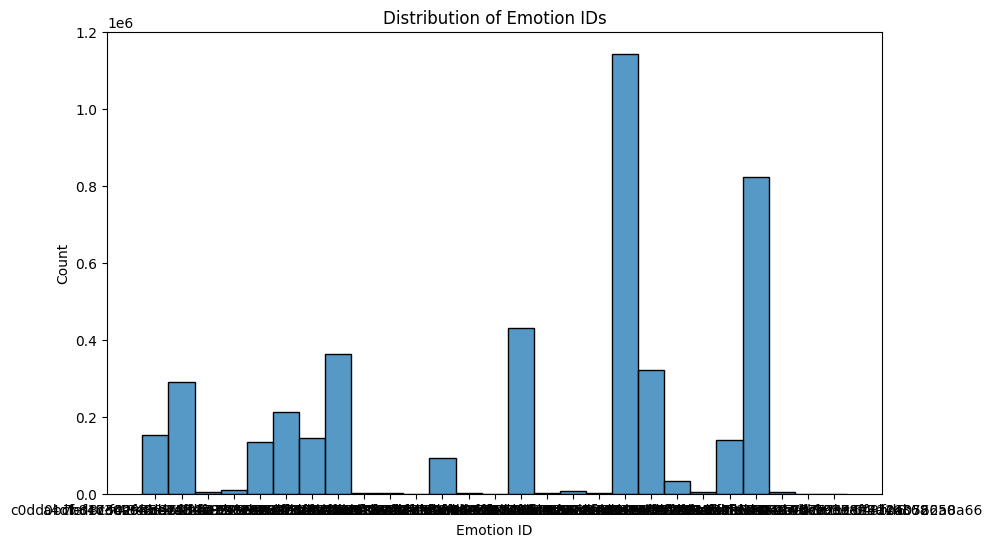

<ipython-input-25-8b2330d303e0>:21: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  plt.tight_layout()  # Adjust plot layout to prevent overlapping labels
<ipython-input-25-8b2330d303e0>:21: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()  # Adjust plot layout to prevent overlapping labels
<ipython-input-25-8b2330d303e0>:21: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()  # Adjust plot layout to prevent overlapping labels
<ipython-input-25-8b2330d303e0>:21: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from current font.
  plt.tight_layout()  # Adjust plot layout to prevent overlapping labels
<ipython-input-25-8b2330d303e0>:21: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.
  plt.tight_layout()  # Adjust plot layout to prevent overlapping labels
<ipython-input-25-8b2330d303e0>:21: User

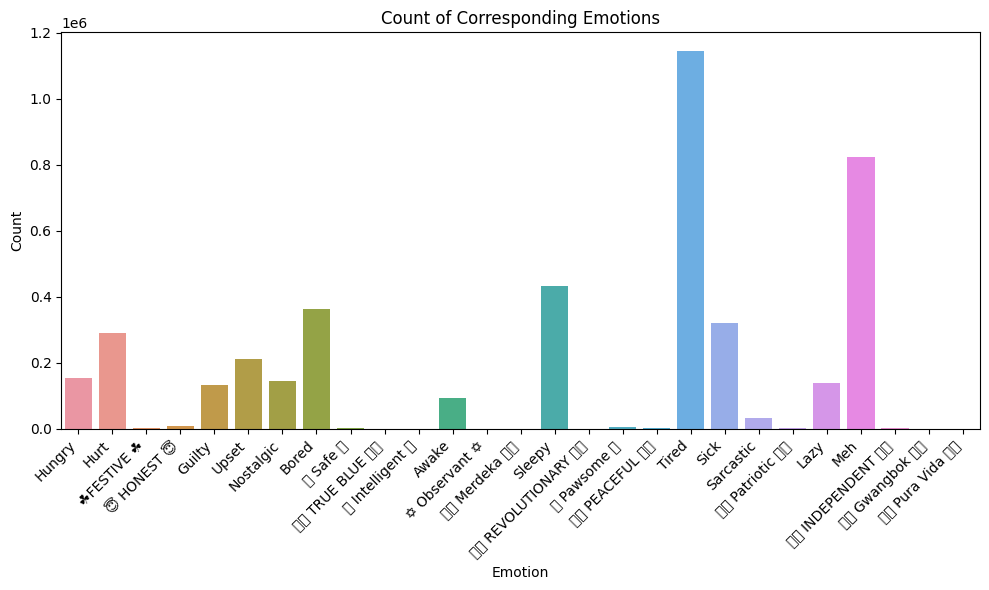

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Perform data visualization
# Bar plot of a categorical column with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_feeling_text_df, x="name_y")
plt.title("Count of Corresponding Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust plot layout to prevent overlapping labels
plt.show()

In [ ]:
# Convert all the non-guilty label into "Non-guilty"
merged_feeling_text_df['name_y'] = merged_feeling_text_df['name_y'].apply(lambda x: 'Non-guilty' if x != 'Guilty' else 'Guilty')

In [ ]:
# Print the updated dataframe
merged_feeling_text_df.head()

,id_y,name_y,emotion_id,user_id,created_at,reactions,text
0,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-12-03 03:09:30.627,0.0,omg eat too much need to stop fr
1,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-11-21 16:26:33.627,4.0,im starving literally
2,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-11-17 16:24:22.192,6.0,i always have snack before my meals cause real...
3,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,bde48414-c86e-398f-bfd1-1c00c0f941d4,2016-07-30 19:40:43.437,0.0,ugh
4,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,cde621f6-965e-491d-a5c4-92b0247994bc,2016-01-21 11:27:13.498,3.0,craving for pizza and siomai


In [ ]:
# Show the number of Guilty vs. Non-guilty
merged_feeling_text_df['name_y'].value_counts()

Non-guilty    4184892
Guilty         133449
Name: name_y, dtype: int64

In [ ]:
# Separate the dataframe into 'Guilty' and 'Non-guilty' dataframes
guilty_df = merged_feeling_text_df[merged_feeling_text_df['name_y'] == 'Guilty']
non_guilty_df = merged_feeling_text_df[merged_feeling_text_df['name_y'] == 'Non-guilty']

# Sample from 'Non-guilty' dataframe
non_guilty_sample_df = non_guilty_df.sample(n=len(guilty_df), random_state=1)

# Sample 1200 texts from 'guilty' dataframe
guilty_sample_1200 = guilty_df.sample(n=1200, random_state=1)

# Sample 1048 text from non_guilty_sample_df
non_guilty_sample_1048 = non_guilty_sample_df.sample(n=1048, random_state=1)

# Concatenate the sampled 'Non-guilty' dataframe with the 'Guilty' dataframe
balanced_df = pd.concat([guilty_sample_1200, non_guilty_sample_1048])

# Print the balanced dataframe
balanced_df.head()

,id_y,name_y,emotion_id,user_id,created_at,reactions,text
492136,42935e4e-2c07-4bda-8377-d74d4cf817d7,Guilty,42935e4e-2c07-4bda-8377-d74d4cf817d7,ade2fea6-7032-42ff-91a0-c658b309c73a,2017-11-13 23:51:02.710,1.0,i found someone with my biggest cc name as the...
464040,42935e4e-2c07-4bda-8377-d74d4cf817d7,Guilty,42935e4e-2c07-4bda-8377-d74d4cf817d7,58e98f18-1096-4700-835a-639f36bcbb88,2018-03-13 10:46:05.409,7.0,only thing miss about my ex is the sex
535871,42935e4e-2c07-4bda-8377-d74d4cf817d7,Guilty,42935e4e-2c07-4bda-8377-d74d4cf817d7,95040dec-ba22-4f26-bc5e-e2e0fd0f164e,2018-08-19 03:46:02.832,0.0,i mean naturally have nothing better to do lat...
590524,42935e4e-2c07-4bda-8377-d74d4cf817d7,Guilty,42935e4e-2c07-4bda-8377-d74d4cf817d7,72afdf5c-81ae-3682-9a28-8cab3089fdc5,2016-06-21 19:57:34.489,0.0,my advisor sort of went off on me when sent he...
466974,42935e4e-2c07-4bda-8377-d74d4cf817d7,Guilty,42935e4e-2c07-4bda-8377-d74d4cf817d7,0dbace7c-d4b4-41c6-b3e7-69627a941075,2016-06-26 15:47:27.413,2.0,i such shit person got my fall backs on speed ...


In [ ]:
merged_feeling_text_df.to_csv('preprocessed.csv')

In [ ]:
from google.colab import files
files.download('preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_feeling_text_df.head()

,id_y,name_y,emotion_id,user_id,created_at,reactions,text
0,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-12-03 03:09:30.627,0.0,Omg eat too much need to stop fr
1,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-11-21 16:26:33.627,4.0,Im starving Literally
2,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,3d84e6de-51dd-46dd-8eb1-7417cdcbb41c,2015-11-17 16:24:22.192,6.0,always have snack before my meals cause ...
3,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,bde48414-c86e-398f-bfd1-1c00c0f941d4,2016-07-30 19:40:43.437,0.0,UGHHHHHH
4,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,Non-guilty,c0dd0bcf-81c3-48d8-b75b-e150c24162bc,cde621f6-965e-491d-a5c4-92b0247994bc,2016-01-21 11:27:13.498,3.0,CRAVING FOR PIZZA AND SIOMAI


# CNN Model data import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/deep_learning'

/content/drive/MyDrive/deep_learning


In [3]:
import pandas as pd
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
train.head(20)

,text,label
0,_user_reference_ 1 what your name username rei...,1
1,those who try to stop racism are often the mos...,1
2,the plus side to being sick on the weekend you...,1
3,binaural beats people listen to them when goin...,1
4,sleepyy sleepy slepy,1
5,i gonna start skipping more meals from now on,1
6,i ve never experienced insomnia but here am st...,1
7,do you think she ll notice if just bullshit th...,1
8,so uh found out today my boyfriend best friend...,1
9,maybe should see psychic,1


## CNN Model structure

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# TF-IDF extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train['text'])
X_test = vectorizer.fit_transform(test['text'])
y_train = train['label']
y_test = test['label']


In [ ]:
# Original Network, too simple
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import ParameterGrid
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming X_train, y_train, X_test, and y_test are numpy arrays now
X_train_torch = torch.from_numpy(X_train.toarray()).float().to(device) # changed to float
y_train_torch = torch.from_numpy(y_train.values.astype(np.int64)).long().to(device)

X_test_torch = torch.from_numpy(X_test.toarray()).float().to(device) # changed to float
y_test_torch = torch.from_numpy(y_test.values.astype(np.int64)).long().to(device)

# create Tensor datasets
train_data = TensorDataset(X_train_torch, y_train_torch)
test_data = TensorDataset(X_test_torch, y_test_torch)

# dataloaders
batch_size = 25

# SHUFFLE the data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

# Define hyperparameters to tune
param_grid = {
    'kernel_dim': [64, 128, 256],
    'kernel_sizes': [(3, 4, 5), (2, 3, 4), (1, 2, 3)],
    'dropout': [0.1, 0.2, 0.3, 0.4, 0.5],
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [0.0001, 0.001, 0.01],
}

best_model_params = None
best_test_accuracy = 0

# Grid search over hyperparameters
for params in ParameterGrid(param_grid):

    # Adjusted model
    class CNN(nn.Module):
        def __init__(self, input_dim, kernel_dim=params['kernel_dim'], kernel_sizes=params['kernel_sizes'], dropout=params['dropout']):
            super(CNN, self).__init__()

            self.convs = nn.ModuleList([nn.Conv1d(1, kernel_dim, K) for K in kernel_sizes])
            self.dropout = nn.Dropout(dropout)
            self.fc1 = nn.Linear(len(kernel_sizes) * kernel_dim, 128)
            self.fc2 = nn.Linear(128, 2)

        def forward(self, inputs):
            inputs = inputs.unsqueeze(1)  
            inputs = [F.relu(conv(inputs)) for conv in self.convs]
            inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs]

            concated = torch.cat(inputs, 1)

            if self.training:
                concated = self.dropout(concated)

            out = self.fc1(concated)
            out = F.relu(out)
            out = self.dropout(out)
            out = self.fc2(out)
            return F.log_softmax(out, 1)

    model = CNN(input_dim=X_train.shape[1]).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    loss_function = nn.NLLLoss()

    # Training loop
    for epoch in range(20):  # number of epochs
        model.train()
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = Variable(inputs), Variable(labels)
            optimizer.zero_grad()
            predictions = model(inputs)
            loss = loss_function(predictions, labels)
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(predictions.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train

        # evaluate on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        test_losses = []
        for inputs, labels in test_loader:
            inputs, labels = Variable(inputs), Variable(labels)
            predictions_test = model(inputs)
            loss_test = loss_function(predictions_test, labels)
            test_losses.append(loss_test.item())

            # Calculate accuracy
            _, predicted_test = torch.max(predictions_test.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

        test_accuracy = correct_test / total_test

        # Check if this model has the best accuracy and update
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_params = params

        print(f'Epoch: {epoch}, Training Loss: {loss.item()}, Test Loss: {np.mean(test_losses)}, Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

print("Best test accuracy: ", best_test_accuracy)
print("Best model parameters: ", best_model_params)

In [ ]:
# Current Model
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import ParameterGrid
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming X_train, y_train, X_test, and y_test are numpy arrays now
X_train_torch = torch.from_numpy(X_train.toarray()).float().to(device) # changed to float
y_train_torch = torch.from_numpy(y_train.values.astype(np.int64)).long().to(device)

X_test_torch = torch.from_numpy(X_test.toarray()).float().to(device) # changed to float
y_test_torch = torch.from_numpy(y_test.values.astype(np.int64)).long().to(device)

# create Tensor datasets
train_data = TensorDataset(X_train_torch, y_train_torch)
test_data = TensorDataset(X_test_torch, y_test_torch)

# dataloaders
batch_size = 25

# SHUFFLE the data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

# Define hyperparameters to tune
param_grid = {
    'kernel_dim': [64, 128, 256],
    'kernel_sizes': [(3, 4, 5), (2, 3, 4), (1, 2, 3)],
    'dropout': [0.1, 0.2, 0.3, 0.4, 0.5],
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [0.0001, 0.001, 0.01],
}

best_model_params = None
best_test_accuracy = 0

# Grid search over hyperparameters
for params in ParameterGrid(param_grid):

    # Adjusted model
    # Adjusted model
    class CNN(nn.Module):
        def __init__(self, input_dim, kernel_dim=params['kernel_dim'], kernel_sizes=params['kernel_sizes'], dropout=params['dropout']):
            super(CNN, self).__init__()

            self.convs = nn.ModuleList([nn.Conv1d(1, kernel_dim, K) for K in kernel_sizes])

            self.batchnorms = nn.ModuleList([nn.BatchNorm1d(kernel_dim) for _ in kernel_sizes])

            self.dropout = nn.Dropout(dropout)
            self.fc1 = nn.Linear(len(kernel_sizes) * kernel_dim, 128)
            self.fc2 = nn.Linear(128, 64)
            self.fc3 = nn.Linear(64, 2)

        def forward(self, inputs):
            inputs = inputs.unsqueeze(1)  
            inputs = [F.relu(conv(inputs)) for conv in self.convs]
            inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs]
            inputs = [batchnorm(i) for i, batchnorm in zip(inputs, self.batchnorms)]

            concated = torch.cat(inputs, 1)

            if self.training:
                concated = self.dropout(concated)

            out = self.fc1(concated)
            out = F.relu(out)
            out = self.dropout(out)
            out = self.fc2(out)
            out = F.relu(out)
            out = self.dropout(out)
            out = self.fc3(out)
            return F.log_softmax(out, 1)


    model = CNN(input_dim=X_train.shape[1]).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    loss_function = nn.NLLLoss()

    # Training loop
    for epoch in range(20):  # number of epochs
        model.train()
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = Variable(inputs), Variable(labels)
            optimizer.zero_grad()
            predictions = model(inputs)
            loss = loss_function(predictions, labels)
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(predictions.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train

        # evaluate on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        test_losses = []
        for inputs, labels in test_loader:
            inputs, labels = Variable(inputs), Variable(labels)
            predictions_test = model(inputs)
            loss_test = loss_function(predictions_test, labels)
            test_losses.append(loss_test.item())

            # Calculate accuracy
            _, predicted_test = torch.max(predictions_test.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

        test_accuracy = correct_test / total_test

        # Check if this model has the best accuracy and update
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_params = params

        print(f'Epoch: {epoch}, Training Loss: {loss.item()}, Test Loss: {np.mean(test_losses)}, Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

print("Best test accuracy: ", best_test_accuracy)
print("Best model parameters: ", best_model_params)

Epoch: 0, Training Loss: 0.6665769815444946, Test Loss: 0.7198476278547592, Training Accuracy: 0.5446292290548829, Test Accuracy: 0.5684179934674047
Epoch: 1, Training Loss: 0.6782029271125793, Test Loss: 0.6831221017360783, Training Accuracy: 0.5476678746336302, Test Accuracy: 0.5925858170201779
Epoch: 2, Training Loss: 0.7247437834739685, Test Loss: 0.6655929030242193, Training Accuracy: 0.5481220327555693, Test Accuracy: 0.6343217135268256
Epoch: 3, Training Loss: 0.6620899438858032, Test Loss: 0.688161433262394, Training Accuracy: 0.5481313968405577, Test Accuracy: 0.6105058766726604
Epoch: 4, Training Loss: 0.6682371497154236, Test Loss: 0.6739659676863204, Training Accuracy: 0.5478879306308584, Test Accuracy: 0.6574926273838705
Epoch: 5, Training Loss: 0.640980064868927, Test Loss: 0.7135502891585109, Training Accuracy: 0.547471228848873, Test Accuracy: 0.4255878119974203
Epoch: 6, Training Loss: 0.6387866735458374, Test Loss: 0.7100097307573093, Training Accuracy: 0.547185624256